<a href="https://colab.research.google.com/github/shahjamanbadhon/machine-learning-practice/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### All the packages and library files


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold ,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import randint, loguniform
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import NotFittedError



### Install PyCaret

In [ ]:
!pip install pycaret[full]       # For all modules

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.

### Google Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Access the drive path location for the dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/task/data/weather.csv'

### Read the CSV type file

In [ ]:
df = pd.read_csv(dataset_path)

### Drop column Date

In [ ]:
df.drop(columns=['Date'], inplace=True)

### Visualize the dataset

In [ ]:
df

,Temperature,Humidity,Wind Speed,Rainfall
0,17.8,74.2,18.5,44.3
1,27.8,82.3,6.6,28.3
2,24.4,96.0,9.5,2.7
3,12.9,23.9,10.5,35.9
4,30.9,77.5,22.4,39.6
...,...,...,...,...
1995,15.9,90.4,15.7,38.6
1996,26.9,20.6,10.4,37.9
1997,16.9,84.0,17.0,4.3
1998,21.8,86.0,7.5,19.1


In [ ]:
attr = ['Temperature', 'Humidity', 'Rainfall']

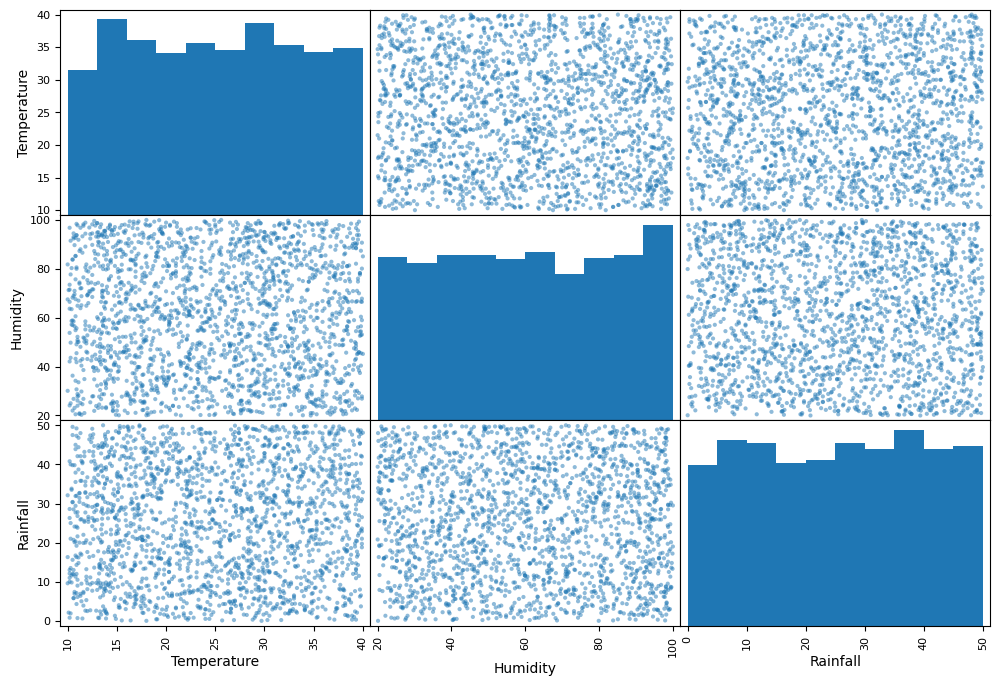

In [ ]:
pd.plotting.scatter_matrix(df[attr], figsize=(12,8))
plt.show()

In [ ]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
reg = setup(data=df, target='Rainfall', session_id=42, verbose=False)

### Compare models

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,12.6416,210.5316,14.5037,-0.0086,0.8447,2.5586,0.0230
br,Bayesian Ridge,12.6429,210.5692,14.5050,-0.0087,0.8447,2.5587,0.0220
omp,Orthogonal Matching Pursuit,12.6637,211.1666,14.5253,-0.0115,0.8453,2.5578,0.0210
lasso,Lasso Regression,12.6605,211.1882,14.5265,-0.0118,0.8453,2.5532,0.0210
llar,Lasso Least Angle Regression,12.6605,211.1882,14.5265,-0.0118,0.8453,2.5532,0.0230
en,Elastic Net,12.6616,211.2506,14.5287,-0.0121,0.8454,2.5521,0.0200
lr,Linear Regression,12.6637,211.3524,14.5322,-0.0127,0.8454,2.5510,0.8590
ridge,Ridge Regression,12.6637,211.3524,14.5322,-0.0127,0.8454,2.5510,0.0210
lar,Least Angle Regression,12.6637,211.3524,14.5322,-0.0127,0.8454,2.5510,0.0220
ada,AdaBoost Regressor,12.6495,211.7149,14.5431,-0.0140,0.8444,2.5475,0.0510


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Evaluate the best model

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Finalize and Predict

In [ ]:
final = finalize_model(best)
predictions = predict_model(final, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Dummy Regressor,12.4968,207.2242,14.3953,0.0000,0.8367,2.3747
